#### Written by Gabriel Borges Pinheiro
[Github](github.com/gabrielbopi)

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def db(X):
    return 10 * np.log10(np.abs(X))

In [3]:
def inv_db(X):
    return 10**(X/10)

In [4]:
def dbm(X):
    return 10 * np.log10(np.abs(X)/(1e-3))

In [5]:
def inv_dbm(X):
    return (1e-3) * 10**(X/10)

In [6]:
def β_channel(D):
    """
    Returns the 
    """
    #Carrier frequency (LTE band 7)
    f = 2.6e9
    #Wavelength
    λ = 3e8/f
    R = D
    #Linear pathloss
    L_lin =  (λ/(4*np.pi*R))**2
    β = L_lin
    return β


In [19]:
def rand_channel(D, N):
    """
    Returns the channel
    """
    β = β_channel(D)
    ampl = np.sqrt(β)/2
    h = (np.random.randn(N) + 1j*np.random.randn(N)) * ampl
    return h


In [8]:
def compute_snr(D, N, P_t_dbm):     #P_t: Power of transmitted singnal
    h = rand_channel(D, N)
    #Nomalizing for precoding
    v = np.conj(h) / np.linalg.norm(h)
    P_t = inv_dbm(P_t_dbm)
    #Power of noise (-127dBm is average)
    sqr_σ = inv_dbm(-127)
    #Transmitting SNR
    SNR_t = P_t/sqr_σ
    
    SNR = np.abs(v.transpose() @ h)**2 * SNR_t
    return SNR

In [9]:
def snr_samples(mc, D, N, P_t):
    """
    Computes SNR samples of Monte Carlo realizations
    """
    samples_snr = np.array([])
    for i in range(mc):
        samples_snr = np.append(samples_snr, compute_snr(D, N, P_t))
    return samples_snr

##### Main parameters

In [33]:
#Number of Monte Carlo realizations
mc = 100
#Number of resolution for plotting
n = 30
#Number of array's antennas
N = 64

##### For a fixed range max of distance

In [11]:
#Maximum range between BS and UE [meter] inner cell
D_max = 150
#BS localization
R_bs = np.array([0,0,15])
#Generate a random point for 1 UE position (a estimate height for the UE antenna = 1.5m)
R_ue = np.array(np.append(np.sqrt(D_max)*np.random.randn(2), 1.5))
#Distance between UE and BS
R = np.linalg.norm(R_ue - R_bs)

print('UE location: {}'.format(R_ue))

UE location: [-9.1650742  -5.58440483  1.5       ]


Average SNR: 122.28152325177149
Average SNR: 132.31350613359578
Average SNR: 142.30233959465085


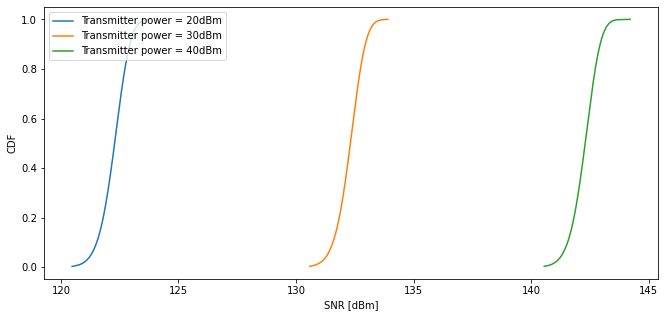

In [31]:
fig, ax = plt.subplots(figsize = (11,5))

#Power of transmitted signal
AmountP_t = np.array([20, 30, 40]) #dBm

for P_t in AmountP_t:
    snr = np.sort(snr_samples(mc, R, N, P_t))
    average_snr = np.mean(snr)
    std_snr = np.std(snr)
    print('Average SNR: {}'.format(dbm(average_snr)))

    cdf_snr = norm.cdf(snr, loc=average_snr, scale=std_snr)

    label = 'Transmitter power = {}dBm'.format(P_t)
    ax.plot(dbm(snr), cdf_snr, label=label)

ax.set_ylabel("CDF")
ax.set_xlabel("SNR [dBm]")
plt.legend()

##### Using Monte Carlo realizations for the distances also

Average SNR: 124.46852375259527
Average SNR: 134.34900993795065
Average SNR: 144.34437839472753


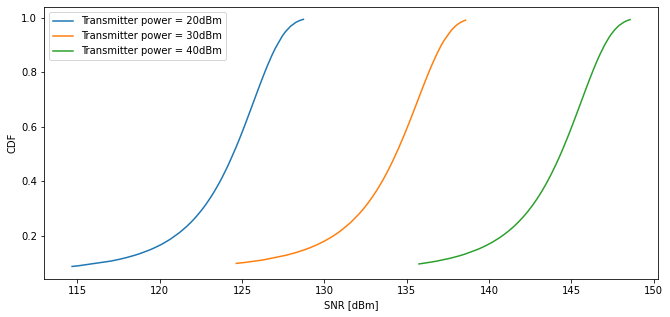

In [48]:
fig, ax = plt.subplots(figsize = (11,5))
mc = 100

#Power of transmitted signal
AmountP_t = np.array([20, 30, 40]) #dBm

for P_t in AmountP_t:
    snr = np.array([])    
    for i in range(mc):
        #Generate a random point for 1 UE position (a estimate height for the UE antenna = 1.5m)
        R_ue = np.array(np.append(np.sqrt(D_max)*np.random.randn(2), 1.5))
        #Distance between UE and BS
        R = np.linalg.norm(R_ue - R_bs)
        #Getting samples of the SNR
        snr = np.append(snr, np.mean(snr_samples(mc, R, N, P_t)))
    
    snr = np.sort(snr) 
    average_snr = np.mean(snr)
    std_snr = np.std(snr)
    print('Average SNR: {}'.format(dbm(average_snr)))

    cdf_snr = norm.cdf(snr, loc=average_snr, scale=std_snr)

    label = 'Transmitter power = {}dBm'.format(P_t)
    ax.plot(dbm(snr), cdf_snr, label=label)

ax.set_ylabel("CDF")
ax.set_xlabel("SNR [dBm]")
plt.legend()

##### Plot for a fixed Transmitter power of 40dBm

UE location (max 150m): [-35.17399538 -17.04083067   1.5       ]
Average SNR: 138.90722252544208
UE location (max 250m): [ 30.74926915 -13.01509862   1.5       ]
Average SNR: 140.2167390265421
UE location (max 300m): [19.10968497 17.43340404  1.5       ]
Average SNR: 142.0953094195242


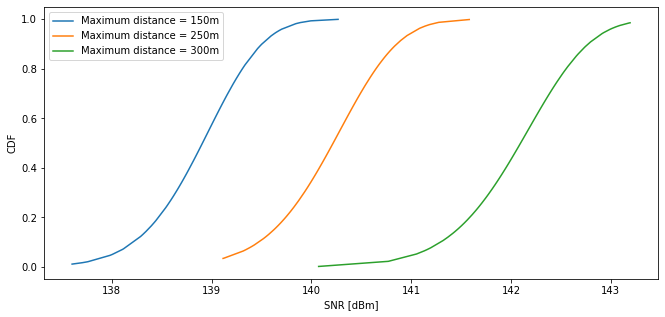

In [46]:
P_t = 40 #dBm
fig, ax = plt.subplots(figsize = (11,5))

#Maximum range between BS and UE [meter] inner cell
rangeD = np.array([150, 250, 300])
#Maximum range between BS and UE [meter] inner cell
for D_max in rangeD:
    #Generate a random point for 1 UE position (a estimate height for the UE antenna = 1.5m)
    R_ue = np.array(np.append(np.sqrt(D_max)*np.random.randn(2), 1.5))
    #Distance between UE and BS
    R = np.linalg.norm(R_ue - R_bs)
    print('UE location (max {max}m): {position}'.format(max=D_max, position=R_ue))   
   
    #Getting samples of the SNR
    snr = np.sort(snr_samples(mc, R, N, P_t))
    #computes the mean SNR
    average_snr = np.mean(snr)
    #and standard deviation
    std_snr = np.std(snr)
    print('Average SNR: {}'.format(dbm(average_snr)))
    cdf_snr = norm.cdf(snr, loc=average_snr, scale=std_snr)

    label = 'Maximum distance = {}m'.format(D_max)
    ax.plot(dbm(snr), cdf_snr, label=label)

ax.set_ylabel("CDF")
ax.set_xlabel("SNR [dBm]")
plt.legend()

##### Using Monte Carlo realizations for the distances also

Average SNR: 145.62365780603778dBm (max 150m)
Average SNR: 145.3200148943958dBm (max 250m)
Average SNR: 144.54735941214142dBm (max 300m)


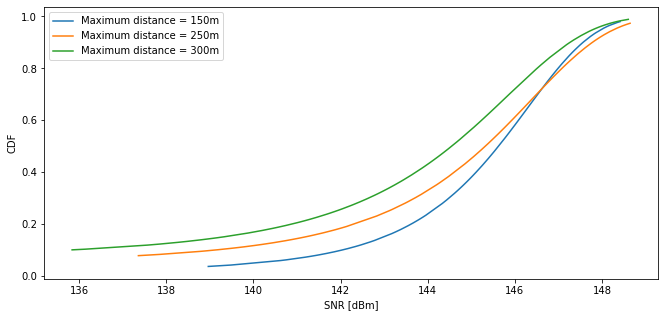

In [42]:
P_t = 40 #dBm
fig, ax = plt.subplots(figsize = (11,5))
mc = 100

#Maximum range between BS and UE [meter] inner cell
rangeD = np.array([150, 250, 300])
#Maximum range between BS and UE [meter] inner cell
for D_max in rangeD:
    snr = np.array([])    
    for i in range(mc):
    
        #Generate a random point for 1 UE position (a estimate height for the UE antenna = 1.5m)
        R_ue = np.array(np.append(np.sqrt(D_max)*np.random.randn(2), 1.5))
        #Distance between UE and BS
        R = np.linalg.norm(R_ue - R_bs)
        #Getting samples of the SNR
        snr = np.append(snr, np.mean(snr_samples(mc, R, N, P_t)))
    
    snr = np.sort(snr)    
    #computes the mean SNR
    average_snr = np.mean(snr)
    #and standard deviation
    std_snr = np.std(snr)
    print('Average SNR: {snr}dBm (max {max}m)'.format(snr=dbm(average_snr), max=D_max))

    cdf_snr = norm.cdf(snr, loc=average_snr, scale=std_snr)

    label = 'Maximum distance = {}m'.format(D_max)
    ax.plot(dbm(snr), cdf_snr, label=label)

ax.set_ylabel("CDF")
ax.set_xlabel("SNR [dBm]")
plt.legend()